<a href="https://colab.research.google.com/github/sayalichaskar293/ML/blob/main/Stock_Prediction(closing_price)_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests

In [ ]:
!pip install pandas-datareader

In [ ]:
!pip install yfinance

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yfin

In [ ]:
from datetime import datetime

In [ ]:
#

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#start = datetime.datetime(2020,1,1)
#end = datetime.datetime(2020,4,17)
#pfizer = pdr.DataReader("PFE","yahoo",start,end)
#pfizer.head()
#aapl = data.DataReader("AAPL",data_source='yahoo',start='2015-1-1', end='2015-12-31')['Adj Close']
yfin.pdr_override()

df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end='2023-11-30')

print(df)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.433825   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.500648   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.639429   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.771557   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.751299   
...                ...         ...         ...         ...         ...   
2023-11-22  191.490005  192.929993  190.830002  191.309998  191.066193   
2023-11-24  190.869995  190.899994  189.250000  189.970001  189.727905   
2023-11-27  189.919998  190.669998  188.899994  189.789993  189.548126   
2023-11-28  189.779999  191.080002  189.399994  190.399994  190.157349   
2023-11-29  190.899994  192.089996  188.970001  189.369995  189.128662   

               Volume  
Date         

In [ ]:
df.shape

(2997, 6)

Text(0, 0.5, 'CLose Price USD($)')

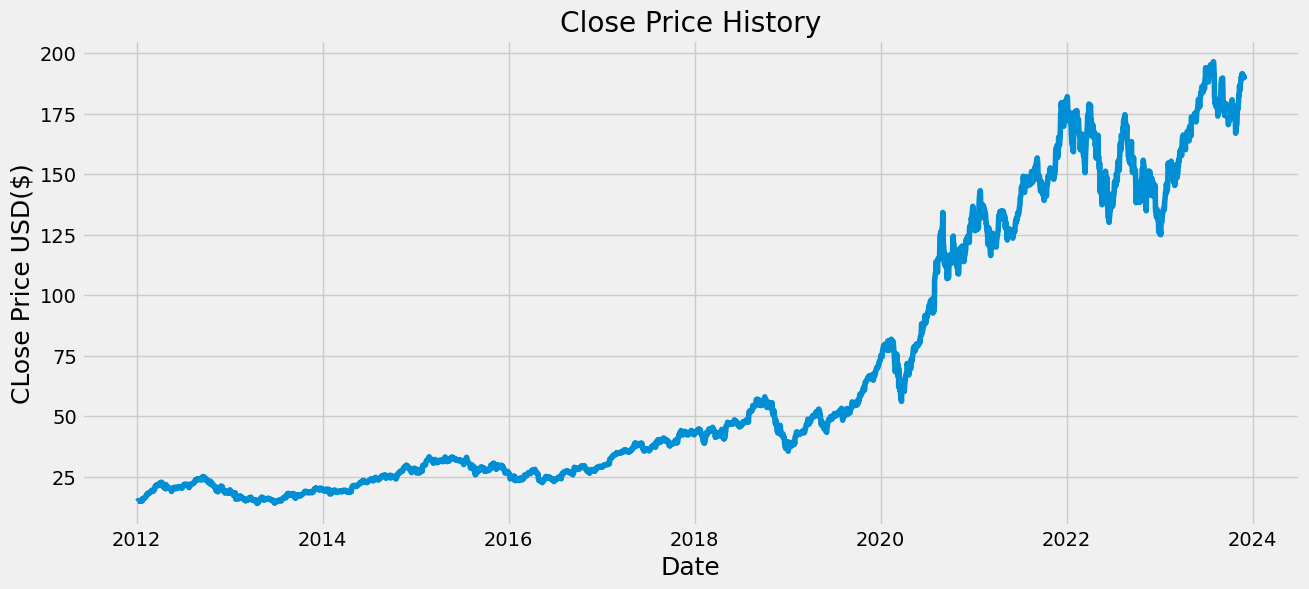

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('CLose Price USD($)', fontsize=18)

In [ ]:
#new df with close column only
data=df.filter(['Close'])
#convert into numpy
dataset=data.values
#get number of rows
training_data_len=math.ceil(len(dataset)*0.8)
print(training_data_len)

2398


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.96350733],
       [0.96684975],
       [0.961206  ]])

In [ ]:
#create scaled training dataset
train_data=scaled_data[0: training_data_len, :]
#split into x y train
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

In [ ]:
#convert x train ytrain to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2338, 60)

In [ ]:
#reshape
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [ ]:
#LSTM
#lstm build
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#compile
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train
model.fit(x_train, y_train, batch_size=1, epochs=1)

2338/2338 [==============================] - 131s 54ms/step - loss: 6.5217e-04


In [ ]:
#create test data
test_data=scaled_data[training_data_len-60: , :]
x_test=[]
y_test=dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
#convert to numpy array
x_test=np.array(x_test)


In [ ]:
#reshape
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#get models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

19/19 [==============================] - 1s 19ms/step


In [ ]:
#error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

4.951276584937298

<ipython-input-151-a1f8f3811227>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


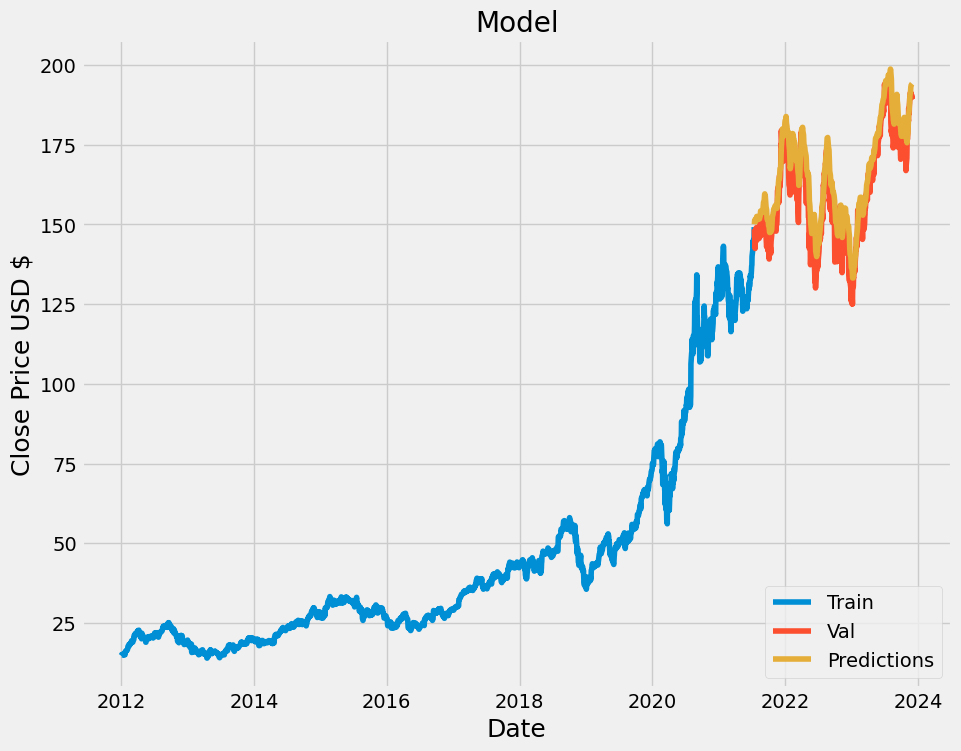

In [ ]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(10, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#valid &predicted price
valid

,Close,Predictions
Date,,
2021-07-15,148.479996,150.039810
2021-07-16,146.389999,151.096298
2021-07-19,142.449997,151.567078
2021-07-20,146.149994,151.092377
2021-07-21,145.399994,151.004639
...,...,...
2023-11-22,191.309998,193.177643
2023-11-24,189.970001,193.782104
2023-11-27,189.789993,194.002869


In [ ]:
#predicting
apple_quote=pdr.get_data_yahoo('AAPL', start='2012-01-01', end='2023-11-30')

new_df=apple_quote.filter(['Close'])

last_60days=new_df[-60:].values

last_60days_scaled=scaler.transform(last_60days)

X_test=[]

X_test.append(last_60days_scaled)

X_test=np.array(X_test)

X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price=model.predict(X_test)

pred_price=scaler.inverse_transform(pred_price)

print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 42ms/step
[[194.01083]]


In [ ]:
yfin.pdr_override()
apple_quote2=pdr.get_data_yahoo('AAPL', start='2023-11-30', end='2023-12-01')
print(apple_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2023-11-30    189.949997
Name: Close, dtype: float64


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, f1_score

ValueError: Classification metrics can't handle a mix of unknown and continuous targets

ValueError: Found array with dim 3. LinearRegression expected <= 2.